# Принятие решений в бизнесе

## Описание проекта:
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.  

Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

## Описание данных:

**Данные для первой части:**  

Файл: `datasets/hypothesis.csv.`  
* Hypothesis — краткое описание гипотезы;  
* Reach — охват пользователей по 10-балльной шкале;  
* Impact — влияние на пользователей по 10-балльной шкале;  
* Confidence — уверенность в гипотезе по 10-балльной шкале;  
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части:**  

Файл: `/datasets/orders.csv.`  
* transactionId — идентификатор заказа;  
* visitorId — идентификатор пользователя, совершившего заказ;  
* date — дата, когда был совершён заказ;  
* revenue — выручка заказа;  
* group — группа A/B-теста, в которую попал заказ.  

Файл: `/datasets/visitors.csv.`  
* date — дата;  
* group — группа A/B-теста;  
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Ход работы:  

### Часть 1. Приоритизация гипотез.
В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.  

Задача:  

* Примените фреймворк `ICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета.  
* Примените фреймворк `RICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета.  
* Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.  

### Часть 2. Анализ A/B-теста.  
Вы провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`.  

Задача:  

Проанализируйте A/B-тест:  

1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.  

2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.  

3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.  
4. Постройте график кумулятивного среднего количества заказов по группам. Сделайте выводы и предположения.  

5. Постройте график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделайте выводы и предположения.  

6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.  

8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.  

9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.  

10. Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделайте выводы и предположения.  

11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.  

12. Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделайте выводы и предположения.  

13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.  

14. Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.  

In [125]:
# Импортируем библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
import scipy.stats as stats
import warnings
from scipy import stats as st

## Предобработка данных

In [126]:
# Снимем ограничение отображения стобцов 
pd.set_option('display.max_columns', None)

# Снимаем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', None)

# Игнорируем предупреждения
warnings.filterwarnings(action='ignore')

# Выставляем ограничение на показ знаков после запятой
pd.options.display.float_format = '{:,.3f}'.format

In [127]:
# Сохраняем файлы в переменные 
try:
    hypothesis, orders, visitors = (
        pd.read_csv('D:/datasets/hypothesis.csv'),
        pd.read_csv('D:/datasets/orders.csv'), 
        pd.read_csv('D:/datasets/visitors.csv') 
    )
except:
    hypothesis, orders, visitors = (
        pd.read_csv('/datasets/hypothesis.csv'),
        pd.read_csv('/datasets/orders.csv'),
        pd.read_csv('/datasets/visitors.csv')
    )

### Предобработка в `hypothesis`

In [128]:
display(hypothesis)
hypothesis.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


**Выоды:**  
Пропусков в данных нет, типы данных совпадают с содержимым столбцов. Видим что в названии столбцов используются буквы в верхнем регистре, для того чтобы не возникало путаницы приведем их к нижнему регистру 

In [129]:
# Приводим названия полей в датафрейме hypothesis к нижнему регистру 
hypothesis.columns = hypothesis.columns.str.lower()
display(hypothesis.columns)

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

### Предобработка в `orders`

In [130]:
display(orders)
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [131]:
hypothesis.columns = hypothesis.columns.str.lower()
orders.columns = [name.replace('Id', '_id') for name in orders.columns]

display(hypothesis.columns)
orders.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

Посмотрим есть ли дубликаты в датафрейме, найдем количество уникальных пользователей в датафрейме

In [132]:
print('Дубликатов в датафрейме:', orders.duplicated().sum())
print('Уникальные значения visitor_id:', orders['visitor_id'].nunique())

Дубликатов в датафрейме: 0
Уникальные значения visitor_id: 1031


Посчитаем сколько пользователей относятся к группе "А" и к группе "B"

In [133]:
visitor_a = orders[['visitor_id', 'transaction_id', 'group']][(orders['group']=='A')]
print('Количество посетителей группы "A":', visitor_a['visitor_id'].count())

visitor_b = orders[['visitor_id', 'transaction_id', 'group']][(orders['group']=='B')]
print('Количество посетителей группы "B":', visitor_b['visitor_id'].count())

Количество посетителей группы "A": 557
Количество посетителей группы "B": 640


Посмотрим сколько пользователей создали заказ который попал в группу "A" и в группу "B"

In [134]:
visitorAB = visitor_a.merge(visitor_b, left_on=['visitor_id'], right_on=['visitor_id'], suffixes=('_A', '_B'))
print('Количество уникальных пользователей совершивших покупки которые вошли в обе группы:', 
      visitorAB['visitor_id'].nunique())

Количество уникальных пользователей совершивших покупки которые вошли в обе группы: 58


**Выводы:**  
Видим что в датафрейме нет пропусков, колонка содержащая дату визита имеет тип данных `object`, также видим что в названиях столбцов `transactionId`, `visitorId` идентификатор - `id` написан слитно и с большой буквы, исправим это. Дубликатов в датафрейме не обнаружено, количество уникальных пользователей - `1031`  

Всего `58` уникальных пользователей чьи заказы попали в обе группы, мы не можем удалить их из датафрейма потому что каждый заказ отражен в датафрейме `visitor` как посещение одного пользователя без указания какой конкретно пользователь посетил сайт в определенный промежуток времени. 

In [135]:
# Приведем к (змениному стилю) написание столбцов в датафрейме
orders.columns = [name.replace('Id', '_id') for name in orders.columns]

# Изменим тип данных для столбца с датами
orders['date'] = pd.to_datetime(orders['date'])

orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

### Предобработка в `visitors`

In [136]:
display(visitors)
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [137]:
print('Дубликатов в датафрейме:', visitors.duplicated().sum())

Дубликатов в датафрейме: 0


**Выводы:**  
Пропуски в столбцах отсутствуют, видим что в колонке с датами тип данных `object`, приведем его в тип `date`

In [138]:
# Изменим тип данных для столбца с датами
visitors['date'] = pd.to_datetime(visitors['date'])

## Часть 1. Приоритизация гипотез.

### Применим фреймворк `ICE` для приоритизации гипотез. Отсортируем их значения по убыванию приоритета.

In [139]:
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

display(hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False))

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


**Вывод:**  
Приотизируюя гипотезы методом `ICE` видим, что восьмая гипотеза наиболее приорететна - (*сильна*) для дальшейшей её передачи в работу  
Посмотрим что изменится когда мы приотерезируем гипотезы методом `RICE`

### Применим фреймворк `RICE` для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [140]:
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.000


**Вывод:**  
Приотерезируя гипотезы методом `RICE` видим, что если добавить в критерий приоретизации "Охват пользователей" которых затронет изменение наибольший приоретет будут иметь иные гипотезы. Гипотеза метода `ICE` сместилась на пятую строчку, таким образом мы понимаем что охват пользователей при использовании восьмой гипотезы не так велик как например у седьмой

## Часть 2. Анализ A/B-теста

### 1. Построим график кумулятивной выручки по группам

In [141]:
# Создаем массив уникальных пар значений дат и групп теста
dates_grouped = orders[['date', 'group']].drop_duplicates()

# Получаем агрегированные кумулятивные по дням данные о заказах 
orders_grouped = dates_grouped.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                                     orders['group'] == x['group'])]
                                     .agg({'date': 'max',
                                           'group': 'max',
                                           'transaction_id': 'nunique',
                                           'visitor_id': 'nunique',
                                           'revenue': 'sum',}), axis=1,).sort_values(by=['date', 'group'])
orders_grouped.head(5)

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [142]:
# Получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_grouped = dates_grouped.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                                                         visitors['group'] == x['group'])]
                                       .agg({'date': 'max', 
                                             'group': 'max', 
                                             'visitors': 'sum'}), axis=1,).sort_values(by=['date', 'group'])
visitors_grouped.head(5)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [143]:
# Объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_grouped.merge(visitors_grouped, left_on=['date', 'group'], right_on=['date', 'group'])

cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [144]:
# Добавим столбец с конверсией
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']
cumulative_data.head(5)

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033
1,2019-08-01,B,21,20,101217,713,0.029
2,2019-08-02,A,44,38,242401,1338,0.033
3,2019-08-02,B,45,43,266748,1294,0.035
4,2019-08-03,A,68,62,354874,1845,0.037


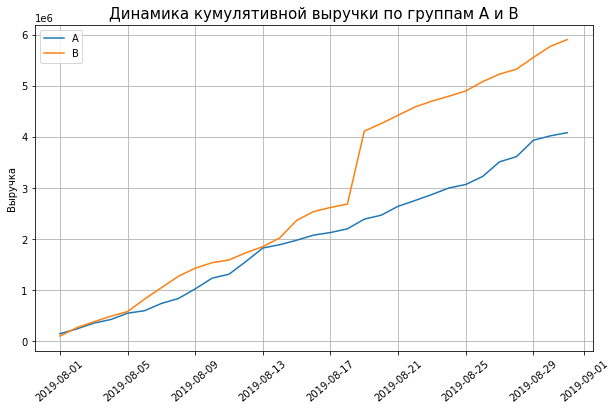

In [145]:
# Построим график комулятивной выручки по группам

# Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10, 6))
plt.grid(True)
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.title('Динамика кумулятивной выручки по группам А и В', fontsize=15)
plt.ylabel("Выручка")
plt.xticks(rotation=40)
plt.legend()
plt.show()

**Вывод:**  
На графике комулятивной выручки мы можем видеть, что в группе "B" приблезительно от 18 августа начинается резкий скачек выручки, в то время как график группы "A" растет линейно  
Резкий рост выручки возможен когда кто-то совершил большой заказ, возможно это была череда заказов нескольких пользователей или же один большой заказ одного пользователя за раз 

### 2. Построим график кумулятивного среднего чека по группам.

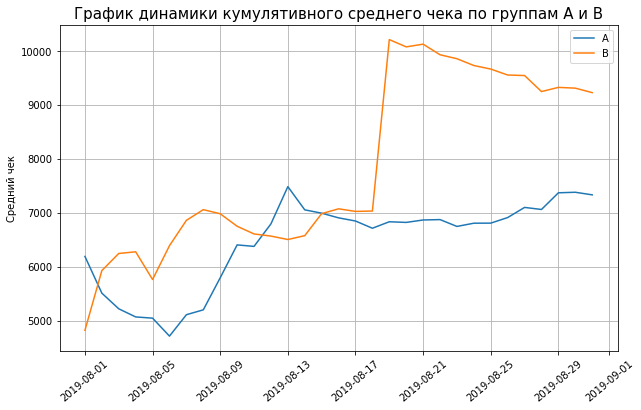

In [146]:
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.plot(cumulative_revenue_a['date'], 
         cumulative_revenue_a['revenue'] / cumulative_revenue_a['orders'],
         label='A')

plt.plot(cumulative_revenue_b['date'], 
         cumulative_revenue_b['revenue'] / cumulative_revenue_b['orders'], 
         label='B')

plt.title('График динамики кумулятивного среднего чека по группам А и В', fontsize=15)
plt.ylabel("Средний чек")
plt.xticks(rotation=40)
plt.legend()
plt.show()

**Вывод:**  
На графике видим что в группе "B" идет резкий рост среднего чека в районе 18 августа, что говорит в пользу версии о дорогой покупке. В то же время на графике "А" видим что в начале присутствует спад среднего чека который потом невилируется большим средним чеком и далее график стабилизируется.

### 3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A

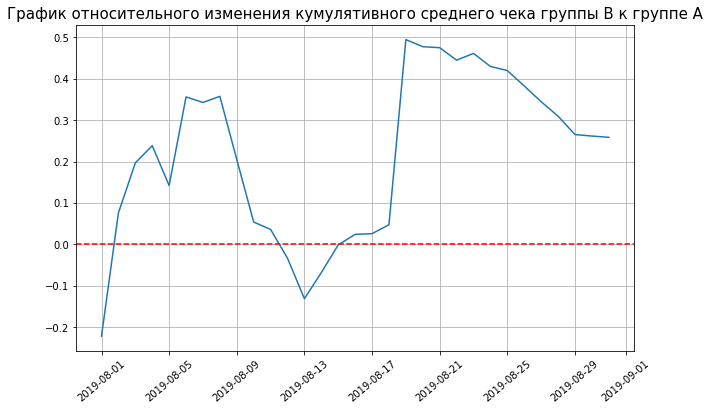

In [147]:
# Cобираем данные в одном датафрейме
cumulative_revenue_ab = cumulative_revenue_a.merge(cumulative_revenue_b, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', 
                                                   suffixes=['_a', '_b'])

# Построим график отношения средних чеков группы "B" к группе "А"
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.plot(cumulative_revenue_ab['date'], 
        (cumulative_revenue_ab['revenue_b']/
         cumulative_revenue_ab['orders_b'])/(cumulative_revenue_ab['revenue_a']/cumulative_revenue_ab['orders_a'])-1)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=15)
plt.xticks(rotation=40)
plt.show()

**Вывод:**  
На графике мы можем видеть резкий рост комулятивного среднего чека в нескольких точках на графике, что явно говорит нам о некоторых вбросах, больших покупках.

### 4. Построим график кумулятивного среднего количества заказов по группам

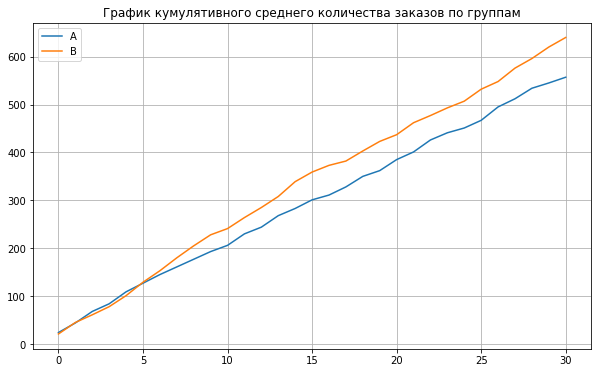

In [148]:
# Создаем датафрейм комулятивных метрик группы "A"
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# Создаем датафрейм комулятивных метрик группы "B"
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# Строим график
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.plot(cumulative_revenue_ab['orders_a'], label='A')
plt.plot(cumulative_revenue_ab['orders_b'], label='B')
plt.legend()
plt.title('График кумулятивного среднего количества заказов по группам')
plt.xlabel(' ')
plt.show()

**Вывод:**  
Видим что сначала график конверсии заказов сильно скачет относительно групп, но потом группа "B" выходит на стабильно высокий уровень конверсии относительно группы "A" из чего следует вывод - в группе "B" средний уровень заказов относительно посетителей стабыльно выше чем у группы "A"

### 5. Построим график относительного изменения кумулятивного среднего количества заказов группы B к группе A

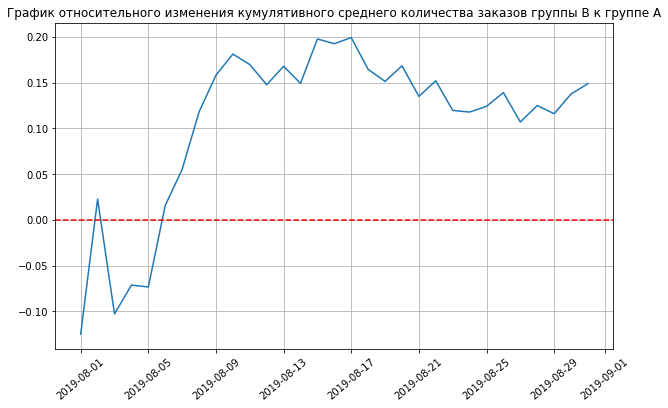

In [149]:
# Cобираем данные в одном датафрейме
cumulative_revenue_ab = cumulative_revenue_a.merge(cumulative_revenue_b, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', 
                                                   suffixes=['_a', '_b'])

# Построим график отношения комулятивного среднего количества заказов группы "B" к группе "А"
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.plot(cumulative_revenue_ab['date'],
         (cumulative_revenue_ab['orders_b'])/
         (cumulative_revenue_ab['orders_a'])-1)
plt.axhline(y=0, color='red', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего количества заказов группы B к группе A')
plt.xticks(rotation=40)
plt.show()

**Вывод:**  
Видим что в одну дату был совершон крупный заказ, а затем график начинает стабилизироваться. В группе "B" среднее количество заказов стабильно выше чем у группы "A"

### 6. Постройте точечный график количества заказов по пользователям

Нужно выявить пользователей интернет магазина которые соврешили больше всего заказов, такие пользователи влияют на конверсию, количество заказов на количество посетителей интернет магазина

In [150]:
orders_by_users = (orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'}))
orders_by_users.columns = ['visitor_id', 'orders']
display(orders_by_users.head(5))
orders_by_users['orders'].describe()

,visitor_id,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


count   1,031.000
mean        1.161
std         0.725
min         1.000
25%         1.000
50%         1.000
75%         1.000
max        11.000
Name: orders, dtype: float64

Видим что есть пользователь совершивший 11 заказов  
Построим точечный график количества заказов по пользователям

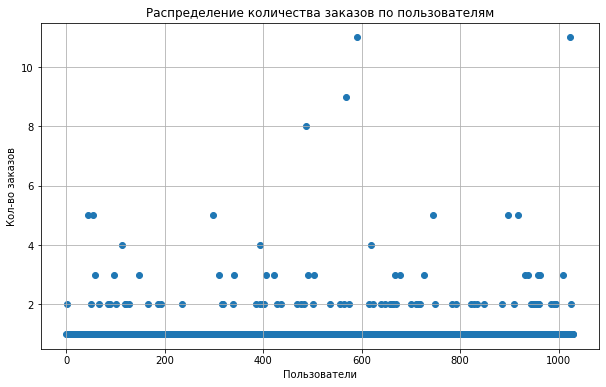

In [151]:
# Задаем интервал размером от 0 до количества записей в orders_by_users
x_values = pd.Series(range(0,len(orders_by_users)))

# Строим точечную диаграмму
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.scatter(x_values, orders_by_users['orders'], alpha=1)
plt.title('Распределение количества заказов по пользователям')
plt.ylabel('Кол-во заказов')
plt.xlabel('Пользователи')
plt.show()

**Выводы:**  
Видим очевидные выбросы пользователей совершивших более 10 заказов, так же пользователей совершивших от 4-х до 9 заказов. Очень много пользователей сделали 2 - 3 заказа, по графику мы не можем понять считать их выбросами или нет, следует определить границу выявления "аномальных" пользователей

### 7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей

In [152]:
# Воспользуемся функцией percentile из библиотеки numpy
np.percentile(orders_by_users['orders'], [95, 99])

array([2., 4.])

**Выводы:**  
Не более 5% пользователей совершили более 2-х заказов, не более 1% пользователей совршили 4 заказа  
За границу для "нормальных" заказов пользователей возьмем не более 4-х заказов на одного пользователя

### 8. Построим точечный график стоимостей заказов

In [153]:
display(orders['revenue'].describe())

count       1,197.000
mean        8,348.006
std        39,191.132
min            50.000
25%         1,220.000
50%         2,978.000
75%         8,290.000
max     1,294,500.000
Name: revenue, dtype: float64

Видим что пирсуствует очевидный выброс, есть заказ стоимостью выше 1млн Д.Е., в то время как у 75% пользователей заказ не превышает стоемость в 8тыс Д.Е. Построим точечный график стоимости заказов

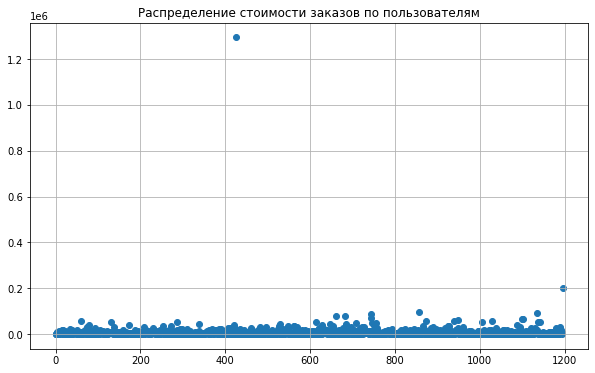

In [154]:
# Задаем интервал размером от 0 до количества записей в orders['revenue']
x_values = pd.Series(range(0,len(orders['revenue'])))

# Строим точечную диаграмму
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.scatter(x_values, orders['revenue'], alpha=1)
plt.title('Распределение стоимости заказов по пользователям')
plt.show()

**Вывод:**  
Отчетливо видим тот самый заказ который отражался резким пиком на графиках комулятивных метрик и выводил в топ группу "B"  
На таком графике не получится определить как распределяется стоимость заказов по пользователям, избавимся от выбросов и посмотрим на рапределение

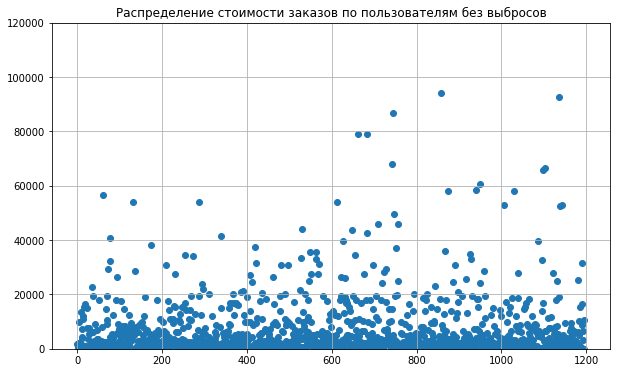

In [155]:
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.ylim(0, 120000)
plt.scatter(x_values, orders['revenue'], alpha=1)
plt.title('Распределение стоимости заказов по пользователям без выбросов')
plt.show()

**Вывод:**  
Так стало понятнее, чаще всего стоимость заказов пользователей не превышает 20000 Д.Е. Но все еще много пользователей которые совршили заказы стоимостью от 20000 до 40000 Д.Е. Нужно определить потолок выявления "Аномальных" заказов

### 9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов

In [156]:
# Воспользуемся функцией percentile из библиотеки numpy
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

**Вывод:**  
Не более 5% пользователей совершили заказ дороже 28000 Д.Е., и не более 1% совершили заказ дороже 58233 Д.Е. Границу за которой будут аномально высокие заказы определим по верхнему персентелю: 58233 Д.Е.

### 10. Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным

Посчитать статистическую значимость различий в среднем количестве заказом между группами по "Сырым" данным значит - посчитать статистическую значимость не удаляя выбросы из данных  

Сформулируем гипотезы:  
**H0** - различий в среднем количестве заказов по «сырым» данным между группами **нет**  
**H1** - различия в среднем количестве заказов по «сырым» данным между группами **есть**

Зададим уровень значимости alpha=**0.05**

In [157]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [158]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [159]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('P-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный выигрыш группы В у группы А:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.017
Относительный выигрыш группы В у группы А: 0.138


**Вывод:**  
Видим что p-value равен 0.017 это значит что нулевую гипотезу H0 отвергаем  
**Различия в среднем количестве заказов между группами есть**  
Относительный выигрыш группы B равен 13.8%.

### 11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем чеке между группами по «сырым» данным - без удаления аномальных пользователей  

Сформулируем гипотезы:  
**H0** - различий в среднем чеке заказа по «сырым» данным между группами **нет**  
**H1** - различия в среднем чеке заказа по «сырым» данным между группами **есть**

Зададим уровень значимости alpha=**0.05**

In [160]:
print('P-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                                      orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост группы B к группе A:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/
                                                                     orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value: 0.729
Относительный прирост группы B к группе A: 0.259


**Вывод:**  
P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия нет, а наблюдаемое превышение среднего чека группы В на 25,9% не является значимым, получено случайно.

### 12. Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным

Для того чтобы отчистить данные от выбросов воспользуемся выводами предыдущих задач из которых мы выяснили, что пользователь совершивший более 4-х заказов, а так же заказы дороже 58233 Д.Е. являются аномальными. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 4 - `usersWithManyOrders` и пользователей, совершивших заказы дороже 58233 - `usersWithExpensiveOrders`. Объединим их в таблице `abnormal_users`.


Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным

Сформулируем гипотезы:  
**H0** - различий в среднем количестве заказов по «очищенным» данным между группами **нет**  
**H1** - различия в среднем количестве заказов по «очищенным» данным между группами **есть**

Зададим уровень значимости alpha=**0.05**

In [161]:
many_orders = np.percentile(orders_by_users['orders'], 99)
expensive_orders = np.percentile(orders['revenue'], 99)


usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > many_orders]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > many_orders]['userId'],
    ],
    axis=0,
)


usersWithExpensiveOrders = orders[orders['revenue'] > expensive_orders]['visitor_id']


abnormal_users = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormal_users.head(5))
abnormal_users.shape[0]

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
dtype: int64

15

Всего 15 аномальных пользователей  
Узнаем, как их действия повлияли на результаты теста  
Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным  
Сначала подготовим выборки количества заказов по пользователям по группам теста  

In [162]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [163]:
print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост группы B к группе A:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value: 0.014
Относительный прирост группы B к группе A: 0.153


**Вывод:**  
На очищенных данных разница в количестве заказов между группами есть, гипотиза **H1 верна**, а относительный прирост заказов группы В отнистельно группы А увеличился на 15.3%.

### 13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

Посчитаем статистическую значимость различий в среднем чеке между группами по «очищеным» данным

Сформулируем гипотезы:  
**H0** - различий в среднем чеке заказа по "очищенным" данным между группами **нет**  
**H1** - различия в среднем чеке заказа по "очищенным" данным между группами **есть**

Зададим уровень значимости alpha=**0.05**

In [164]:
print('P-value:', '{0:.3f}'.format(stats.mannwhitneyu(
    orders[(orders['group']=='A') & np.logical_not(orders['visitor_id'].isin(abnormal_users))]['revenue'],
    orders[(orders['group']=='B') & np.logical_not(orders['visitor_id'].isin(abnormal_users))]['revenue']
    )[1]))


print('Относительный прирост группы B к группе A:', 
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value: 0.851
Относительный прирост группы B к группе A: -0.006


**Вывод:**  
P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. По разнице средних чеков групп различий практически нет

## Выводы

На основе проведенных работ по приоретизации гипотез фреймворка `ICE` и `RICE` можем предложить интернет-магазину обратить внимание на 7, 8, 0 гипотезы. Они позволят интернет-магазину охватить наибольшее количество пользователей не затрачивая слишком больших усилий.  
По результатам A/B теста можем сказать что по сырым данным в гурппах есть статистически значимые различия, но после фильтрации корверсия в группе "B" выше чем в группе "A"  
Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий. При этом средний чек группы В выше  

На основании проведенных работ советую интернет-магазину остановить A/B тест, зафиксировать победу группы B, комулятивные метрики группы B выше чем у группы A